# Nithya Ramesh

# Data Science and Business Analytics intern
# @The Sparks Foundation(TSF)

# Task 7 (Stock Market Prediction using Numerical and Textual Analysis)

#### Objective: Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

#### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

#### Reading and Checking Data of Stock Dataset

In [2]:
data = pd.read_csv("NQ=F.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-14,11269.50,11302.50,10918.75,11144.80957,11144.80957,957669
1,2020-09-21,10920.00,11222.00,10656.50,11136.50000,11136.50000,3350326
2,2020-09-28,11145.00,11604.75,11140.25,11233.25000,11233.25000,3047573
3,2020-10-05,11308.50,11739.00,11197.50,11724.75000,11724.75000,2265592
4,2020-10-12,11722.75,12249.00,11687.75,11798.00000,11798.00000,3231323


In [3]:
data.shape

(27, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       27 non-null     object 
 1   Open       27 non-null     float64
 2   High       27 non-null     float64
 3   Low        27 non-null     float64
 4   Close      27 non-null     float64
 5   Adj Close  27 non-null     float64
 6   Volume     27 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.6+ KB


In [5]:
data.nunique()

Date         27
Open         27
High         27
Low          27
Close        27
Adj Close    27
Volume       27
dtype: int64

In [6]:
list_columns = data.columns
list_columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#### Statistical Information of the dataframe

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01
mean,12375.222222,12682.296296,12090.648148,12446.800709,12446.800709,2.455071e+06
std,829.342242,787.142227,789.074666,800.091070,800.091070,8.708322e+05
min,10920.000000,11222.000000,10656.500000,11046.250000,11046.250000,7.795130e+05
25%,11769.750000,12107.875000,11507.125000,11851.875000,11851.875000,1.903084e+06
50%,12525.000000,12782.500000,12218.250000,12663.750000,12663.750000,2.297992e+06
75%,12919.500000,13313.125000,12694.625000,12922.375000,12922.375000,3.137182e+06
max,13829.500000,13900.500000,13516.750000,13804.750000,13804.750000,3.931585e+06


#### Heatmap using Statistical Information of the dataframe

Text(0.5, 1.0, 'Heatmap')

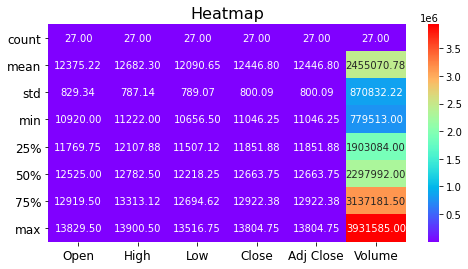

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(data.describe(), annot = True, fmt = '.2f', cmap = 'rainbow')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Heatmap", fontsize = 16)

In [9]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
data['Date'] = pd.to_datetime(data['Date'] ,format='%Y-%m-%d')
data.index = data['Date']

#### History of trading open price

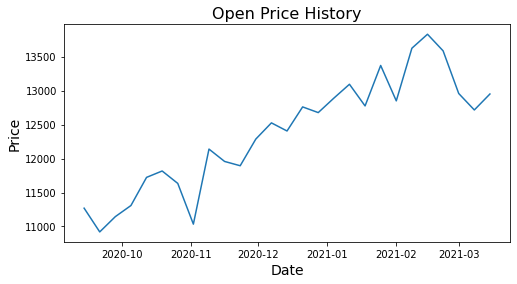

In [14]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Open'])
plt.title("Open Price History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

#### History of trading close price

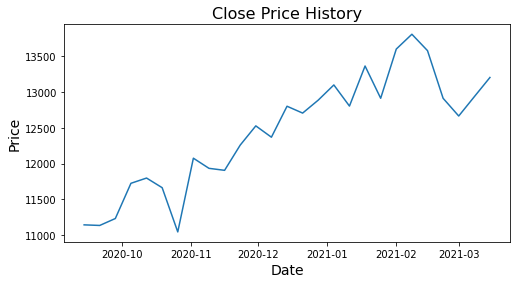

In [15]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Close'])
plt.title("Close Price History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

#### History of stock price growth

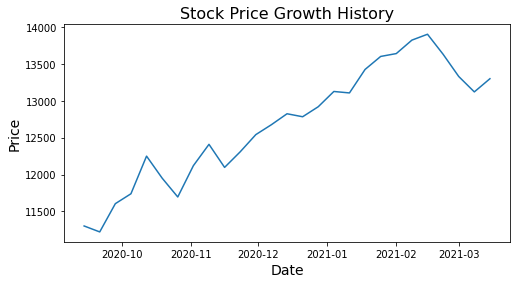

In [16]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['High'])
plt.title("Stock Price Growth History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

#### History of low stock price 

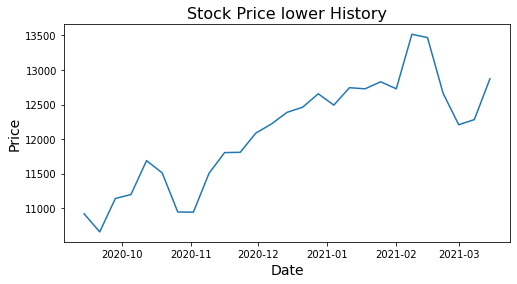

In [17]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Low'])
plt.title("Stock Price lower History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

#### History of adjusted close stock price

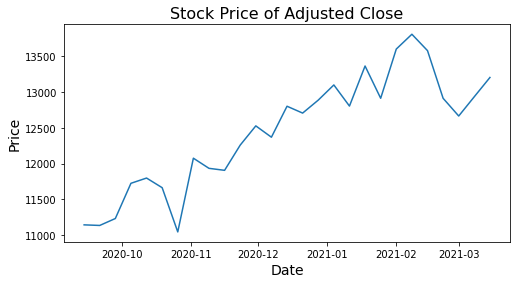

In [18]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Adj Close'])
plt.title("Stock Price of Adjusted Close", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

#### History of stock price volume

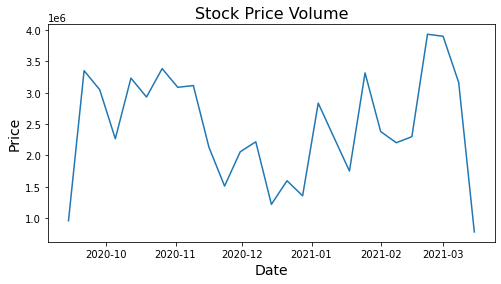

In [19]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Volume'])
plt.title("Stock Price Volume", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

### Stock market volume price Prediction

#### Assigning values for x and y

In [20]:
x = data.iloc[:, 1:7].values
y = data.iloc[:, -1].values

#### Splitting the dataset using train_test_split

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)


#### Standard Scale transform

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

####  Random Forest Regression model training on the Training set

In [23]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

print("The Random Forest Regression model trained")

The Random Forest Regression model trained


In [24]:
y_pred = regressor.predict(x_test)
y_pred

array([3310671.2, 3056682.6, 1383874. , 2324237.7, 3208125.6, 2163649. ,
       3003150.9, 1368383.1, 3003150.9])

#### Visualizing the Train Result

In [25]:
df = pd.DataFrame()
df

""


In [26]:
Pred_x_train = regressor.predict(x_train)

df['predict_train'] = Pred_x_train
df['predict_train']

0     2337833.6
1     2929063.4
2     3330498.6
3     1414855.8
4     1031214.6
5     3100056.8
6     3145433.6
7     3320625.5
8     3237530.1
9     1726043.6
10    2159704.9
11    3166796.9
12    2278838.4
13    2375123.0
14    1078524.6
15    2197384.7
16    1416287.9
17    2298349.5
Name: predict_train, dtype: float64

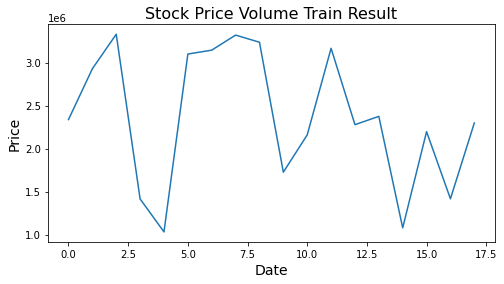

In [27]:
plt.figure(figsize=(8,4))
plt.plot(df['predict_train'])
plt.title("Stock Price Volume Train Result", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

#### Visualizing the Test Result

In [28]:
df1 = pd.DataFrame()
df1

""


In [29]:
df1['predict'] = y_pred
df1['predict']

0    3310671.2
1    3056682.6
2    1383874.0
3    2324237.7
4    3208125.6
5    2163649.0
6    3003150.9
7    1368383.1
8    3003150.9
Name: predict, dtype: float64

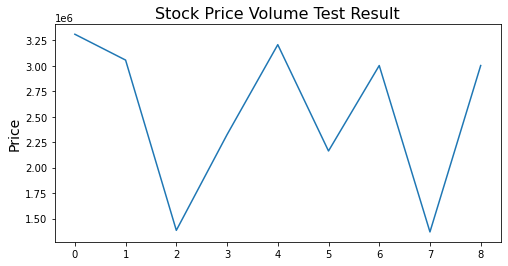

In [30]:
plt.figure(figsize=(8,4))
plt.plot(df1['predict'])
plt.title("Stock Price Volume Test Result", fontsize = 16)
plt.ylabel("Price", fontsize = 14)
plt.show()

#### Accuracy of model

In [31]:
print("Accuracy score : ", np.mean(y_pred==y_test))

Accuracy score :  0.0


####  Reading and Checking dataset of India News

In [32]:
news_df = pd.read_csv('india-news-headlines.csv')
news_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [33]:
news_df.shape

(3424067, 3)

In [34]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [35]:
news_df.dtypes

publish_date          int64
headline_category    object
headline_text        object
dtype: object

In [36]:
news_df['headline_text']

0          Status quo will not be disturbed at Ayodhya; s...
1                        Fissures in Hurriyat over Pak visit
2                      America's unwanted heading for India?
3                         For bigwigs; it is destination Goa
4                       Extra buses to clear tourist traffic
                                 ...                        
3424062    Covid-19: Despite dip in cases; Rajasthan amon...
3424063    Covid-19: Despite dip in cases; Rajasthan amon...
3424064    Covid-19: Despite dip in cases; Rajasthan amon...
3424065    Govt extends deadline for use of FASTag till F...
3424066    Celebs plan to party safely and responsibly on...
Name: headline_text, Length: 3424067, dtype: object

#### Removing Duplicates

In [37]:
news_df.drop('headline_category', axis=1, inplace=True)
news_df['publish_date'] = pd.to_datetime(news_df['publish_date'], format='%Y%m%d')
news_df.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [38]:
news_df.rename(columns={'publish_date': 'Date'}, inplace = True)

news_df = news_df.drop_duplicates()
news_df.reset_index(inplace=True, drop=True)
news_df.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [39]:
news_df = news_df[:1000]

#### Importing TextBlob

In [40]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

news_df['Subjectivity'] = news_df['headline_text'].apply(getSubjectivity)
news_df['Polarity'] = news_df['headline_text'].apply(getPolarity)
news_df.head()

,Date,headline_text,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.00
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.00
2,2001-01-02,America's unwanted heading for India?,0.000000,0.00
3,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.00
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.05


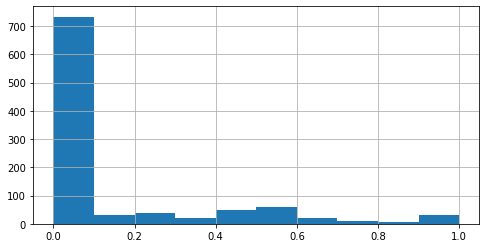

In [41]:
plt.figure(figsize = (8,4))
news_df['Subjectivity'].hist()
plt.show()

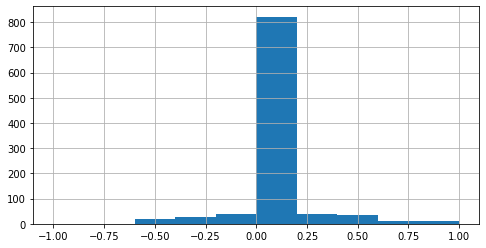

In [42]:
plt.figure(figsize = (8,4))
news_df['Polarity'].hist()
plt.show()

#### SentimentIntensity Analyzer

In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

senti_ana = SentimentIntensityAnalyzer()

news_df['compound'] = [senti_ana.polarity_scores(i)['compound'] for i in news_df['headline_text']]
news_df['Negative'] = [senti_ana.polarity_scores(i)['neg'] for i in news_df['headline_text']]
news_df['Neutral'] = [senti_ana.polarity_scores(i)['neu'] for i in news_df['headline_text']]
news_df['Positive'] = [senti_ana.polarity_scores(i)['pos'] for i in news_df['headline_text']]

news_df.head()

,Date,headline_text,Subjectivity,Polarity,compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.00,0.2924,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.00,0.0000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India?,0.000000,0.00,-0.2263,0.322,0.678,0.000
3,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.00,0.0000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.05,0.3818,0.000,0.658,0.342


####  The Accuracy of our prediction using this model is 48 % Accurate.
####  News headline data and stock data have different month of year 2001 and 2021 respectively. so news headline not that much useful for stock prediction.

#### Thank You